# 機械学習をPythonで実践する-1　　～ 線形回帰の基礎 ～
参考：  
* [Udemy「【前編】米国データサイエンティストがやさしく教える機械学習超入門【Pythonで実践】」](https://www.udemy.com/share/1077bS3@bUCyxS-VD-KW9E4jHmBJMoj_5PK2dfHpvowX0VmKHCHS13OuPdwG4hFdoF_2hk-7/)

In [40]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
from cost_func import cost_func
from grad_descent import grad_descent
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ○ 最急降下法をスクラッチで実装する
リソース：~/python-work/TIL/Python/sample_data/ML_sample/sample_data.csv

In [7]:
# サンプルデータ（賃貸の広さと家賃の関係データ）を読み込む
df = pd.read_csv('../Python/sample_data/ML_sample/sample_data.csv')
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


<AxesSubplot:xlabel='space', ylabel='rent'>

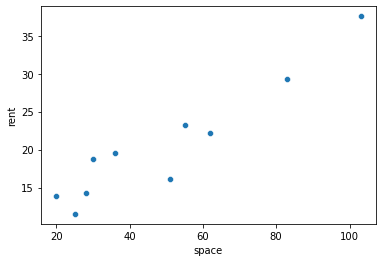

In [8]:
# データを可視化
sns.scatterplot(x=df['space'], y=df['rent'])

### - 損失関数を定義

In [21]:
# 損失関数cost_funcを呼び出し
# thetaは線形回帰モデルのパラメタの初期値
theta = np.array([[2.0,1.0]])
# .valuesでnumpy arrayで値を取得
target_var = df['rent'].values
features = df['space'].values
cost_func(theta, target_var=target_var, features=features)

array([1296.33604159])

### - 損失関数を可視化する
講義のやり方では2パラメタ（と1つの特徴量）のみの対応だが、任意のパラメタ数に  
対応できるように関数の拡張を目指す。

In [22]:
# 3Dプロット用のデータを用意する。
# x,y軸はtheta_0,theta_1
# z軸は損失関数の戻り値（MSE）

# サンプルデータより、theta_0の範囲（切片）は-20～20、theta_1（傾き）の範囲は -1 ～ 1と設定。
n0 = n1 = 300
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

theta_0 = np.linspace(min_0,max_0,n0)
theta_1 = np.linspace(min_1,max_1,n1)
theta_mesh = np.meshgrid(theta_0,theta_1)
theta_mesh

[array([[-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        ...,
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ]]),
 array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-0.99331104, -0.99331104, -0.99331104, ..., -0.99331104,
         -0.99331104, -0.99331104],
        [-0.98662207, -0.98662207, -0.98662207, ..., -0.98662207,
         -0.98662207, -0.98662207],
        ...,
        [ 0.986622

In [23]:
# 10/8 thetaをリストで渡せるようにcost_funcを修正した。
theta = [theta_0, theta_1]
# パラメータの全組み合わせをリスト化し、配列に変換
theta_array = np.array(list(product(*theta)))
target_var = df['rent'].values
features = df['space'].values
mse = cost_func(theta_array, target_var=target_var, features=features)

In [24]:
mse_reshape = mse.reshape(len(theta_0), len(theta_1))
mse_reshape

array([[9180.43815951, 9109.88103261, 9039.60106593, ...,  407.8256952 ,
         419.58515089,  431.6217668 ],
       [9156.38986166, 9085.92096644, 9015.72923143, ...,  409.9822049 ,
         421.82989227,  433.95473985],
       [9132.37735759, 9061.99669405, 8991.89319072, ...,  412.17450839,
         424.11042743,  436.32350669],
       ...,
       [3611.44522664, 3567.0929073 , 3523.01774817, ..., 2621.66060542,
        2659.62486867, 2697.86629212],
       [3598.02768236, 3553.7635947 , 3509.77666724, ..., 2634.44786869,
        2672.50036362, 2710.83001875],
       [3584.64593187, 3540.47007588, 3496.5713801 , ..., 2647.27092575,
        2685.41165235, 2723.82953916]])

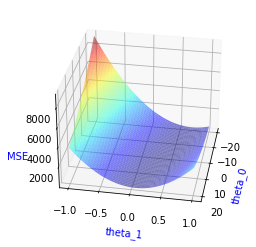

In [25]:
# グラフの描画
# theta_mesh[0],theta_mesh[1]の配列がそのままではMSEの値と対応していないので、転置している。(これはmeshgridとproductの結果で判断)
ax = plt.axes(projection='3d')
ax.plot_surface(X=theta_mesh[0].T, Y=theta_mesh[1].T, Z=mse_reshape, cmap='jet', alpha=0.5)
ax.set_xlabel("theta_0", size = 10, color = "b")
ax.set_ylabel("theta_1", size = 10, color = "b")
ax.set_zlabel("MSE", size = 10, color = "b")
# 見る角度を変える
ax.view_init(elev=30, azim=10)

### - 最急降下法のアルゴリズム実装
学習率は$\alpha=0.00005$、反復回数は10万回とする。

In [27]:
# 学習率、反復回数(epochs)を設定。機械学習では反復１回１回をエポックと呼ぶことが多い。
alpha = 0.00005
epochs = 100000
# パラメタの初期値を設定。
# 本来の最急降下法ではパラメタの初期値はランダムに決める
# theta_0_init = np.random.uniform(min_0,max_0)
theta_0 = -5
theta_1 = -0.5
theta_init = np.array([theta_0, theta_1])

In [28]:
# 最急降下法の関数テスト
features = df['space'].values
target_var = df['rent'].values
optimized_theta, theta_history = grad_descent(theta_init, target_var, features, alpha, epochs)

In [29]:
# 最急降下法の結果得られた最適なパラメタ(theta_0,theta_1)の組み合わせ
optimized_theta

(5.692313583745944, 0.2972194648547114)

### - 最急降下法の推移を描画する
* それぞれの$\theta_0$と $\theta_1$ における損失関数の推移を計算
* $\theta_0$と$\theta_1$ の推移を損失関数に合わせて描画
* $\theta_0$と$\theta_1$の推移を等高線で描画
* 得られた$\theta_0$と$\theta_1$の解で回帰直線を描画

In [30]:
# thetaの履歴の値に対応する損失関数の値を求める。
# 講義のようにリスト内包表記で計算するよりもnumpy arrayを渡して計算した方が早い。
params_and_mse = np.array(theta_history)
mse_history = cost_func(params_and_mse, target_var, features)

In [31]:
mse_history

array([2936.33697597, 1418.4319227 ,  695.35537741, ...,    6.56254019,
          6.56252192,    6.56250366])

mseの計算履歴を確認すると、どんどん損失が小さくなっていることが分かる。

In [32]:
mse_history.shape

(100001,)

In [33]:
params_and_mse.shape

(100001, 2)

In [34]:
# theta_historyとmse_historyを結合
params_and_mse = np.concatenate((params_and_mse, mse_history.reshape(len(mse_history),1)), axis=1)
params_and_mse[0]

array([-5.00000000e+00, -5.00000000e-01,  2.93633698e+03])

In [35]:
params_and_mse[:,0]

array([-5.        , -4.99497026, -4.99141822, ...,  5.69225315,
        5.69228337,  5.69231358])

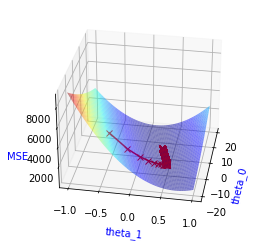

In [36]:
# 図１：損失関数とパラメタの点推移の描画。
ax1 = plt.axes(projection='3d')
# ax1は損失関数の概形を描画ずるものなので、theta_historyでplot_surfaceを書き直す必要はないことに注意。
ax1.plot_surface(X=theta_mesh[0].T, Y=theta_mesh[1].T, Z=mse_reshape, cmap='jet', alpha=0.5)
# 見やすいようにx軸（theta_0）を逆向きにする
plt.gca().invert_xaxis()
# ラベル付与
ax1.set_xlabel("theta_0", size = 10, color = "b")
ax1.set_ylabel("theta_1", size = 10, color = "b")
ax1.set_zlabel("MSE", size = 10, color = "b")
# 最急降下法のパラメタとそのときの損失関数の値をプロット
ax1.plot(xs=params_and_mse[:,0], ys=params_and_mse[:,1], zs=params_and_mse[:,2], marker='x',color='red')

# 見る角度を変える
ax1.view_init(elev=30, azim=10)


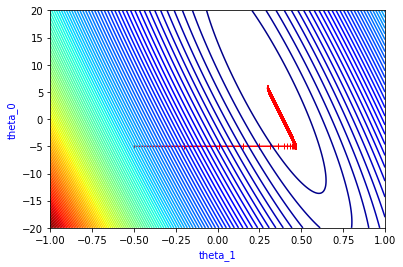

In [37]:
# 図２：パラメタを2次元等高線で表わす。
# 参考：https://it-mayura.com/python/pm013/
ax2 = plt.axes()
ax2.set_xlabel("theta_1", size = 10, color = "b")
ax2.set_ylabel("theta_0", size = 10, color = "b")
ax2.plot(params_and_mse[:,1], params_and_mse[:,0], marker='|', color='red')
# 等高線のレベル（z方向の高さ）を定義。mseの最小値と最大値の範囲で100分割する
levels = np.linspace(mse_reshape.min(),mse_reshape.max(),100)
# 等高線を描画。上図の見方に合わせるため、ここではx軸はtheta_1,y軸はtheta_0とする。レベルにはmse_reshapeを指定。
# 引数はplot_surfaceのものでOK。
ax2.contour(theta_mesh[1].T, theta_mesh[0].T,mse_reshape, levels=levels,cmap='jet')
ax2.contourf(theta_mesh[1].T, theta_mesh[0].T, mse_reshape,levels=levels ,colors='w')   


復習：  
等高線は値が同じ（上でいう損失関数の値）点を線で結んだもの。線の間隔が細かい領域ほど値の変化が急である。  
上図からわかる通り、最小値は○の中心にある。よって、○の中心に近づいているので、最急降下法のアルゴリズムは正しく実装できたと思われる。

In [38]:
optimized_theta

(5.692313583745944, 0.2972194648547114)

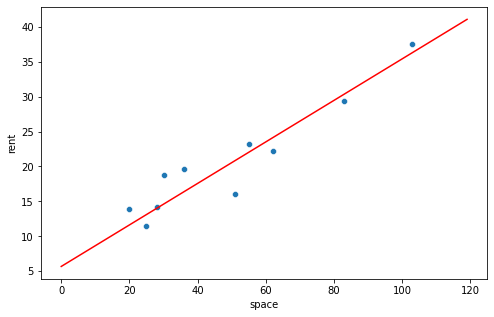

In [39]:
# 図3：最終的に得られた（最適化された）パラメタを使って回帰直線を描画
plt.figure(figsize=(8,5))
sns.scatterplot(x='space', y='rent', data=df)
# x軸、y軸の値を定義。y軸は線形回帰モデルから得られた予測値。
x_reg = np.arange(120)
y_reg =optimized_theta[0] + optimized_theta[1] * x_reg

plt.plot(x_reg, y_reg, color='red')


## x_reg

In [677]:
# まとめ。以下のような線形回帰モデルが得られたことになる。
space = 70
rent = optimized_theta[0] + optimized_theta[1] * space
rent

26.497676123575744

70平米の家賃は上記ぐらいと予想できる。

## ○ 正規方程式を解く

In [734]:
# 特徴量の行列Xを作成。
m = len(df)
X = df['space'].values.reshape(m , 1)
ones = np.ones((m, 1))
# X, onesを行ベクトルにしているときはnp.vstackでもOK
X = np.concatenate([ones, X], axis=1)

In [735]:
X

array([[  1.,  20.],
       [  1.,  25.],
       [  1.,  28.],
       [  1.,  30.],
       [  1.,  36.],
       [  1.,  51.],
       [  1.,  55.],
       [  1.,  62.],
       [  1.,  83.],
       [  1., 103.]])

In [736]:
# 目的変数の列ベクトルを作成
y = df['rent'].values.reshape(m , 1)

In [737]:
# 正規方程式の解を求める
# 下記のように連続して行列の積を求められる。np.dot(A,B)という書き方とA.dot(B)という書き方ができる。
# np.linalg.inv(A): Aの逆行列を求める。linalgはLinear Algebraの略。
theta_normal_eq = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
theta_normal_eq

array([[7.0962325 ],
       [0.27487161]])

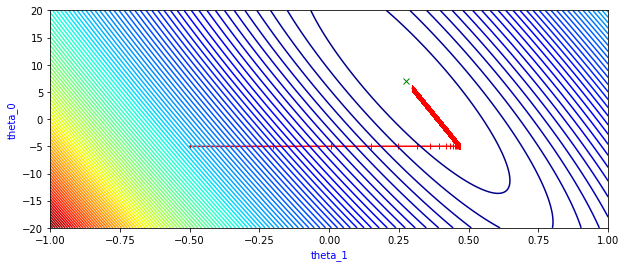

In [709]:
# この結果と最急降下法の結果を等高線で比較してみる。
ax2 = plt.axes()
ax2.set_xlabel("theta_1", size = 10, color = "b")
ax2.set_ylabel("theta_0", size = 10, color = "b")
# 最急降下法の各点の移動履歴をプロット
ax2.plot(params_and_mse[:,1], params_and_mse[:,0], marker='|', color='red')
# 正規方程式の解をプロット
ax2.plot(theta_normal_eq[1], theta_normal_eq[0] , marker='x', color='g')

# 等高線のレベル（z方向の高さ）を定義。mseの最小値と最大値の範囲で100分割する
levels = np.linspace(mse_reshape.min(),mse_reshape.max(),100)
# 等高線を描画。上図の見方に合わせるため、ここではx軸はtheta_1,y軸はtheta_0とする。レベルにはmse_reshapeを指定。
# 引数はplot_surfaceのものでOK。
ax2.contour(theta_mesh[1].T, theta_mesh[0].T,mse_reshape, levels=levels,cmap='jet')
ax2.contourf(theta_mesh[1].T, theta_mesh[0].T, mse_reshape,levels=levels ,colors='w')   


最急降下法によるパラメタは徐々に正規方程式による解析解（緑）に近づいていることが分かる。  
また、解析解が等高線の中心にあることから、損失関数を最小にする解が求められたことが分かる。

## ○ scikit-learnで線形回帰
scikit-learnは機械学習用のライブラリ。  
import sklearnでインポートするので名前注意。  

線形回帰は以下のクラスを使う。1.～3．の流れは線形回帰に限らず他のクラスでも有効。  
sklearn.linear_model.LinearRegressionクラス（内部では正規方程式を使っている。）  
1. インスタンス生成
2. .fit(X, y)メソッドで学習(Xは行列の形.DataFrameでも可)  
※ LinearRegressionクラスに限らずscikit-learnのモデルのクラスの.fitメソッドの引数は全て行列で受け取る
3. .predict(X)で予測（ここも同様にXは行列である必要あり）  
※ .coef_及び.intercept_でパラメータ$\theta$を取得可能

In [789]:
# インスタンス生成。線形回帰モデルを作るイメージ。
# まだ学習していないので何も予測はできない
model = LinearRegression()

# データの準備。特徴量は行列の形にする必要があるので2次元にリシェイプする。
# 目的変数はそのまま１次元配列でOK
X = df['space'].values.reshape(10, 1)
y = df['rent'].values

# 学習させる
model.fit(X, y)

LinearRegression()

In [739]:
# 学習させたモデルで予測する。下記ではXをそのまま入れている。
# 予測値が返ってくる
model.predict(X)

array([12.59366469, 13.96802274, 14.79263756, 15.34238078, 16.99161044,
       21.11468458, 22.21417102, 24.13827229, 29.91057608, 35.40800827])

In [740]:
X

array([[ 20],
       [ 25],
       [ 28],
       [ 30],
       [ 36],
       [ 51],
       [ 55],
       [ 62],
       [ 83],
       [103]])

In [741]:
# 各特徴量のcoefficient（係数）を出力。theta_1以降が出力される
model.coef_

array([0.27487161])

In [742]:
# intercepot（切片）を出力。theta_0が出力される
model.intercept_

7.0962324999088295

In [745]:
# 前回の正規方程式の結果と同じ。
theta_normal_eq

array([[7.0962325 ],
       [0.27487161]])

In [743]:
# 補足。指定した列数によって行数を決めたいときはreshape(-1, 列数)とする。
# いちいちlengthを確認しなくてよくなるので便利
X.reshape(-1, 2)

array([[ 20,  25],
       [ 28,  30],
       [ 36,  51],
       [ 55,  62],
       [ 83, 103]])

## ○ 特徴量スケーリング
### - 標準化
sklearn.preprocessing.StandardScalerクラスを使う。
1. インスタンス生成
2. .fit(X)　※Xは行列またはdf。ここでのfitはパラメタの学習ではなく、Xの平均や標準偏差を計算している。
3. .transform(X)で変換

In [790]:
# サンプルデータ（賃貸の家賃と広さと築年数のデータ）を読み込む
df = pd.read_csv('../Python/sample_data/ML_sample/sample_data2.csv')
df

,space,rent,age
0,20,13.958824,3
1,25,11.533805,13
2,28,14.269547,18
3,30,18.722680,10
4,36,19.602674,6
5,51,16.068166,1
6,55,23.183599,5
7,62,22.212595,2
8,83,29.357010,5
9,103,37.565129,23


In [754]:
# 特徴量はspace,ageとする。複数カラムでフィルタリングする場合はリストでカラム名を入れる。
X = df[['space', 'age']]

In [755]:
X

,space,age
0,20,3
1,25,13
2,28,18
3,30,10
4,36,6
5,51,1
6,55,5
7,62,2
8,83,5
9,103,23


In [9]:
# クラス読み込み、インスタンス生成
scaler = StandardScaler()

In [777]:
# 標準化用に平均、標準偏差を求めておく
scaler.fit(X)

StandardScaler()

In [778]:
# 標準化
X_scaled = scaler.transform(X)

In [781]:
X_scaled

array([[-1.13466215, -0.8062772 ],
       [-0.9410338 ,  0.63350351],
       [-0.82485679,  1.35339387],
       [-0.74740544,  0.2015693 ],
       [-0.51505142, -0.37434298],
       [ 0.06583364, -1.09423334],
       [ 0.22073632, -0.51832106],
       [ 0.49181602, -0.95025527],
       [ 1.3050551 , -0.51832106],
       [ 2.07956852,  2.07328422]])

In [779]:
X.columns

Index(['space', 'age'], dtype='object')

In [769]:
# 標準化されたデータフレームを作成
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,space,age
0,-1.134662,-0.806277
1,-0.941034,0.633504
2,-0.824857,1.353394
3,-0.747405,0.201569
4,-0.515051,-0.374343
5,0.065834,-1.094233
6,0.220736,-0.518321
7,0.491816,-0.950255
8,1.305055,-0.518321
9,2.079569,2.073284


In [780]:
# 標準化された2つの特徴量で線形回帰してみる.
model = LinearRegression()
# dfで入力する
y = df['rent']
model.fit(X_scaled_df, y)

LinearRegression()

In [774]:
model.predict(X_scaled_df)

array([12.1298133 , 14.67416398, 16.08016486, 15.65059069, 16.77405891,
       20.18577717, 21.73881957, 23.2505484 , 29.23304933, 36.75704225])

### - 正規化

In [788]:
# importする。使い方は標準化と同じ。
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fitしてからそのままtransformする書き方
X_scaled = scaler.fit_transform(X)

In [787]:
X_scaled

array([[0.        , 0.09090909],
       [0.06024096, 0.54545455],
       [0.09638554, 0.77272727],
       [0.12048193, 0.40909091],
       [0.19277108, 0.22727273],
       [0.37349398, 0.        ],
       [0.42168675, 0.18181818],
       [0.5060241 , 0.04545455],
       [0.75903614, 0.18181818],
       [1.        , 1.        ]])

## ○ 線形回帰モデルの係数の有意差を検定する
statsmodels.api.OLSクラスを使用する。OLSはOrdinary Least Squaresの略で、最小二乗法を意味する。  
学習するので、予測もできるが、どちらかというと検定などの統計的な情報を見るのに使用する。  
1. OLS(y, X)でインスタンス生成　※Xはバイアス項の列も含む形
2. .fit()　※学習する（パラメタを最小二乗法で算出する）
3. .summary()をprint関数で実行してレポート出力  

※バイアス項用の列(全部1)を追加するには、下記に特徴量行列Xを入れると追加された行列が返ってくる。  
statsmodels.api.add_constant(X)

In [2]:
df = pd.read_csv('../Python/sample_data/ML_sample/sample_data2.csv')
df

,space,rent,age
0,20,13.958824,3
1,25,11.533805,13
2,28,14.269547,18
3,30,18.722680,10
4,36,19.602674,6
5,51,16.068166,1
6,55,23.183599,5
7,62,22.212595,2
8,83,29.357010,5
9,103,37.565129,23


In [3]:
y_col = 'rent'
# Xは目的変数yの列を落とした形とする。落とす列はリストで指定することに注意。
X = df.drop(columns=[y_col])
y = df[y_col]
X

,space,age
0,20,3
1,25,13
2,28,18
3,30,10
4,36,6
5,51,1
6,55,5
7,62,2
8,83,5
9,103,23


In [4]:
# 線形回帰。statsmodels.api
import statsmodels.api as sma
# バイアス項追加
X = sma.add_constant(X)
X

,const,space,age
0,1.0,20,3
1,1.0,25,13
2,1.0,28,18
3,1.0,30,10
4,1.0,36,6
5,1.0,51,1
6,1.0,55,5
7,1.0,62,2
8,1.0,83,5
9,1.0,103,23


In [5]:
# OLSクラスのインスタンスを生成して、学習
est = sma.OLS(y, X)
est_trained =est.fit()
# 学習結果のサマリを出力
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           0.000282
Time:                        23:13:16   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.0

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


サマリの読み方：  
* coef： 係数（$\theta$）
* std err： 標準誤差SE（$\theta$）
* t： t値。※t値なので正確には標準化された値ではないが、各係数ごとのt値をおおよそ比較することはできる。上記だとageが最もゼロに近い。
* P>|t|：   
不等式となっているが、p値を表す。$\theta$およびt値は特徴量データの取り方によって正負どちらも取りうるので、|t|のp値はtのp値の2倍の値となる。（両側検定）  
const,spaceは有意水準0.05以下なので、有意差がある（0ではない）といえるが、ageは0.386なので帰無仮説（０であること）を否定できない。  
ただし、感覚的にage（築年数）は家賃に影響があるはずなので、この検定結果は怪しい。  
このようなときはデータの分布をみてみる。  
※constが０かどうかが重要になるのは特徴量がすべて0の場合であり、ほぼあり得ないので気にする必要はない。


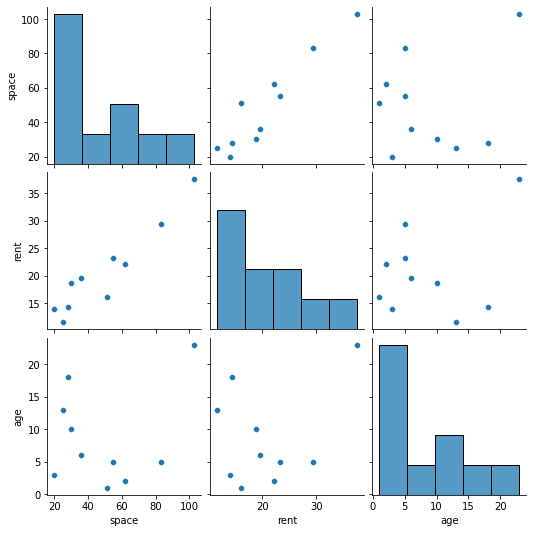

In [6]:
# データ間の関係をざっくり把握したいときはsns.pairplot()を使う
sns.pairplot(df)

上図の3行2列目のrent,ageの相関をみると、今回のサンプルデータではほぼ相関がなさそうなことが分かる。しかも左側にデータが偏っている。      
一方2行1列目のspace,rentは相関が強いことが分かる。  
なので、ageの係数は他の係数より小さく出てしまい、帰無仮説を棄却できない。  
このように、感覚・知見として明らかに検定結果がおかしくデータに原因がありそうな場合は無理にp値が有意水準より大きいからといって、  
特徴量の候補から外す必要はない。データを偏りなく、過不足なく収集することを考えるべき。  


In [21]:
# 標準化した特徴量の場合を見てみる。
X = df.drop(columns=[y_col])
scaler = StandardScaler()
# 標準化されたnumpy arrayが返ってくる
X_scaled = scaler.fit_transform(X)
# バイアス項追加
X_scaled = sma.add_constant(X_scaled)
X_scaled

array([[ 1.        , -1.13466215, -0.8062772 ],
       [ 1.        , -0.9410338 ,  0.63350351],
       [ 1.        , -0.82485679,  1.35339387],
       [ 1.        , -0.74740544,  0.2015693 ],
       [ 1.        , -0.51505142, -0.37434298],
       [ 1.        ,  0.06583364, -1.09423334],
       [ 1.        ,  0.22073632, -0.51832106],
       [ 1.        ,  0.49181602, -0.95025527],
       [ 1.        ,  1.3050551 , -0.51832106],
       [ 1.        ,  2.07956852,  2.07328422]])

In [22]:
# OLSに入れる
est = sma.OLS(y, X_scaled)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           0.000282
Time:                        22:41:34   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6474      0.884     23.355      0.0

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


ここではnumpy arrayを入れたので、カラム名などはなくconst（0列目）,x1（1列目）,x2（2列目）と表示される。  
標準化された特徴量を入れたので、当然coef,std errは標準化しない場合と異なる。このときx1,x2のstd errは同じになる。  
std errが同じなので、t値を計算しなくてもcoefの大小関係だけで特徴量の重要度の比較が可能である。これはt値を求める下式より自明。  
$$t = \frac{\hat{\theta_j} - 0}{SE(\hat{\theta_j})}$$
要は2つの係数の標準誤差$SE(\hat{\theta_j})$と$SE(\hat{\theta_i})$が等しいので、分子（係数）だけで比較ができるということ。  
したがって、coefはx1(6.9) > x2(0.8)なので、x1の方が特徴量として重要度が高いといえる。  
また、x1,x2のt値とp値は標準化してもしなくても変化しない。これは、p値すなわちx1,x2の重要性は標準化してもしなくても変わらないということ。  

上記の結果から、次のことがいえる。
* 1つの係数$\hat{\theta_j}$に着目したとき、
    * $|\hat{\theta_j}|$が大きくなるほど(=影響が大きいほど)、|t|値は大きくなり、p値が小さくなる（t分布の端の方の値をとる。）
    * $SE(\hat{\theta_j})$ が大きくなるほど(=ばらつきが大きいほど)、|t|値は小さくなり、p値が大きくなる（t分布の中心(0)寄りの値をとる。）
* 特徴量を標準化していない場合、|t|値(またはp値)を見ることで特徴量同士の重要度を比較可能。
* 標準化した場合、$SE(\hat{\theta})$は全ての係数$\hat{\theta}$で等しくなるので、|t|値(またはp値)を計算しなくても特徴量の重要度を係数の大小関係で比較可能。
$$t = \frac{\hat{\theta} - 0}{SE(\hat{\theta})}$$

## ○ 係数のF検定
上記のサマリーの結果にF値の結果も出ている。  
F値はF-statistic:32.66、p値がProb (F-statistic):0.000282である。（標準化してもしなくても同じ。）